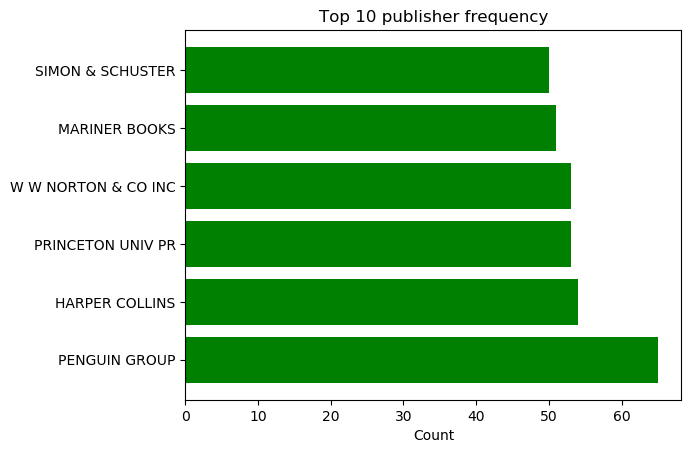

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

catagories = ['Cooking','Literary-collections','Technology-engineering','Drama',
              'Travel','Comic', 'Philosophy','Fiction','Science','Bible','Business-economics',
              'Law','Psychology','History']
pn    = pd.read_csv('all_catagories.csv')
## clean dirty ones 
pn   = pn.drop(list(range(570,950)), axis=0)
#strip white spaces in names 
pn['publisher'] = pn['publisher'].apply(lambda x: x.strip() if type(x) == str else x)



frequncy_publisher1 = pn.groupby('publisher')
frequncy_publisher = pn.groupby('publisher').count()
culumn_name  = 'name'
SeriesFreq_publisher  = frequncy_publisher[culumn_name].sort_values()

get = -6
getToppublisher = SeriesFreq_publisher[get:]

plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
names = getToppublisher.index
y_pos =  np.arange(len(names))
freq  = getToppublisher.values
#error = np.random.rand(len(people))

ax.barh(y_pos, freq, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top 10 publisher frequency')
plt.show()

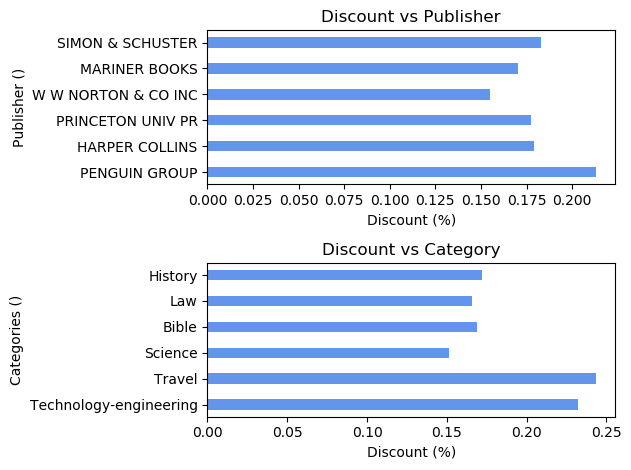

In [4]:
cn = Counter()
publish_dates = pn['publish date']
j = 0
for i in publish_dates:
     j  = j +1
     mm          = pd.Timestamp(i).month_name()
     cn[mm] += 1  

pn['original price']    = pd.to_numeric(pn['original price'])
pn['available numbers'] = pd.to_numeric(pn['available numbers'])
pn['pages'] = pd.to_numeric(pn['pages'])
diff    =  pn['original price'] -  pn['price']
#calculat percent
percent = diff/pn['original price']
# add new discount percont column
pn['discount']= percent

location_publish = []
dicsount_publisher = {}
for i in SeriesFreq_publisher[get:].index:
     temp  =pn.loc[(pn['publisher'] == i)]
     dicsount_publisher[i] = temp.discount.mean()
     location_publish.append([temp, temp.discount.mean()] )
     
     
     

plt.rcdefaults()
fig, ax = plt.subplots(2,1)
# Example data
names = getToppublisher.index
y_pos =  np.arange(len(names))
freq  = list(dicsount_publisher.values())
#error = np.random.rand(len(people))
width = 0.4


ax[0].barh(y_pos, freq, width,
        color='cornflowerblue', ecolor='black')
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(names)
ax[0].invert_yaxis()  # labels read top-to-bottom
ax[0].set_xlabel('Discount (%)')
ax[0].set_ylabel('Publisher ()')
ax[0].set_title('Discount vs Publisher')


location_publish = []
dicsount_publisher = {}
for i in SeriesFreq_publisher[get:].index:
     temp  =pn.loc[(pn['publisher'] == i)]
     dicsount_publisher[i] = temp.discount.mean()
     location_publish.append([temp, temp.discount.mean()] )
     
     
cover  = ['Paperback', 'Hardcover'];

# Seperate by categories
pn_sep_cat = []
# initilize empty
catagories = ['Technology-engineering',
              'Travel',
              'Science',
              'Bible',
              'Law',
              'History']
pn_sep_catd = {k:[] for k in catagories}

discount_category = []
for i in catagories:
   temp = pn.loc[ pn['Category']==i ]
   discount_category.append( temp.discount.mean() )


width = 0.4                     # the width of the bars
ind = np.arange(len(catagories)) 
rects2 = ax[1].barh(ind, discount_category,width,
                color='cornflowerblue', label='Hardcover')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('Categories ()')
ax[1].set_title('Discount vs Category' )
##ax.set_xticks(ind)
ax[1].set_xlabel('Discount (%)')
ax[1].set_yticks(ind)
ax[1].set_yticklabels(tuple(catagories))
fig.tight_layout()
plt.show()


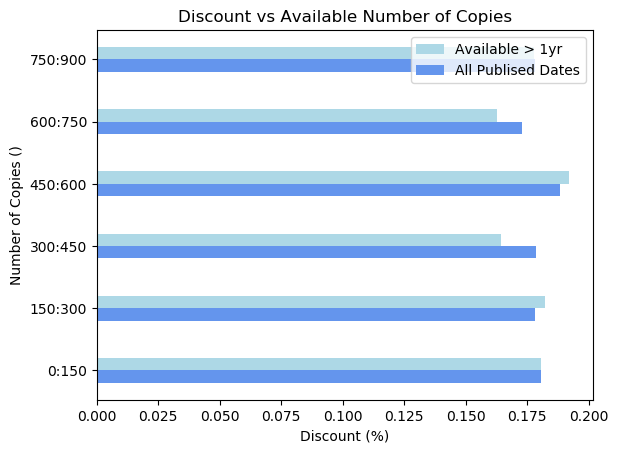

<Figure size 1600x1200 with 0 Axes>

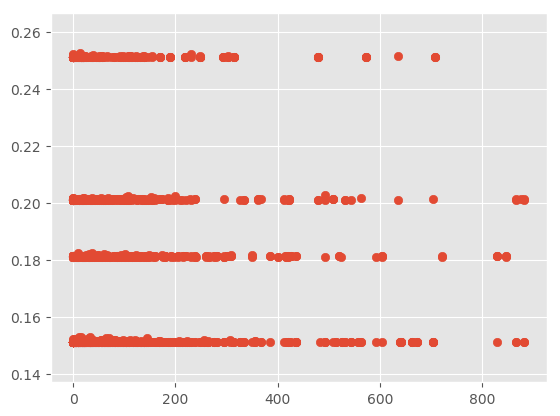

In [5]:
import matplotlib


bins = [300, 450, 600, 750,900, 1050]
r_start = 0
r_end   = 150
available_copyBin  = [] 
disount_binNames  = []
discout_binValues = []
discout_binValues2 = []

tempp = []
for i in bins:
    temp = pn.loc[(pn['available numbers'] >= r_start) & (pn['available numbers'] <= r_end)]
    for ii in temp.index:
        if( pd.Timestamp(temp.loc[ii]['publish date']).year <= 2018):
            if(pd.Timestamp(temp.loc[ii]['publish date']).month <= 3 ):            
                tempp.append(temp.loc[ii].discount)
                
            
    name = str(r_start) + ':' +  str(r_end)
    disount_binNames.append(name)
    discout_binValues.append(temp.discount.mean())
    discout_binValues2.append(np.array(tempp).mean())
    available_copyBin.append(temp)
    r_start = r_end
    r_end   = i
    tempp.clear()

plt.rcdefaults()
fig, ax = plt.subplots()
ind = np.arange(len(disount_binNames)) 


# Example data
plt.figure(figsize=(16,12))

disount_binNames.reverse()
y_pos =  np.arange(len(disount_binNames))
discout_binValues.reverse()
discout_binValues2.reverse()
#error = np.random.rand(len(people))
 
width = 0.2


rects2 = ax.barh(ind - width/2, discout_binValues2,width,
                 color='lightblue', label = 'Available > 1yr ')

rects1 = ax.barh(y_pos + width/2, discout_binValues, width, 
                 color='cornflowerblue', label = 'All Publised Dates')

ax.set_yticks(ind)
ax.set_yticklabels(disount_binNames)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel('Discount (%)')
ax.set_ylabel('Number of Copies ()')
ax.set_title('Discount vs Available Number of Copies')
ax.legend()
plt.show()

t = np.array(pn['available numbers'])
x = t[t < 1000]
t2 = np.array(pn.discount)
y = t2[t < 1000]
crr = np.corrcoef(x, y)


matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.show()


/Users/Hike/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Hike/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


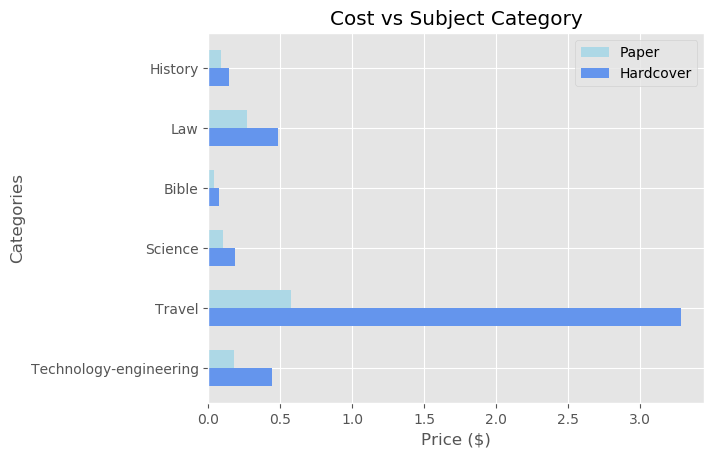

<Figure size 1600x1200 with 0 Axes>

In [6]:
cover  = ['Paperback', 'Hardcover'];

# Seperate by categories
pn_sep_cat = []
# initilize empty
catagories = ['Technology-engineering',
              'Travel',
              'Science',
              'Bible',
              'Law',
              'History']
pn_sep_catd = {k:[] for k in catagories}

for i in catagories:
   temp = pn.loc[ pn['Category']==i ]

   temp['cost_per_page']   = temp.price/temp.pages
   temp.loc[ temp['cost_per_page'] == np.inf  ] = 0
   for j in cover:
       temp2 = temp.loc[ temp['publish type']== j ]
       pn_sep_catd[i].append([j,temp2.cost_per_page.mean()] )
       
paper_y  =  []
hardcover_y = []
for i in catagories:
   paper_y.append(pn_sep_catd[i][0][1])
   hardcover_y.append(pn_sep_catd[i][1][1])

width = 0.3                     # the width of the bars
ind = np.arange(len(catagories)) 
fig, ax = plt.subplots()
plt.figure(figsize=(16,12))


rects1 = ax.barh(ind + width/2,paper_y,width,
                color='lightblue', label='Paper')
rects2 = ax.barh(ind - width/2, hardcover_y,width,
                color='cornflowerblue', label='Hardcover')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Categories')
ax.set_title('Cost vs Subject Category' )
##ax.set_xticks(ind)
ax.set_xlabel('Price ($)')
ax.set_yticks(ind)
ax.set_yticklabels(tuple(catagories))
ax.legend()


#autolabel(rects1, "left")
#autolabel(rects2, "right")
plt.savefig('cost_per_page.png')
plt.show()



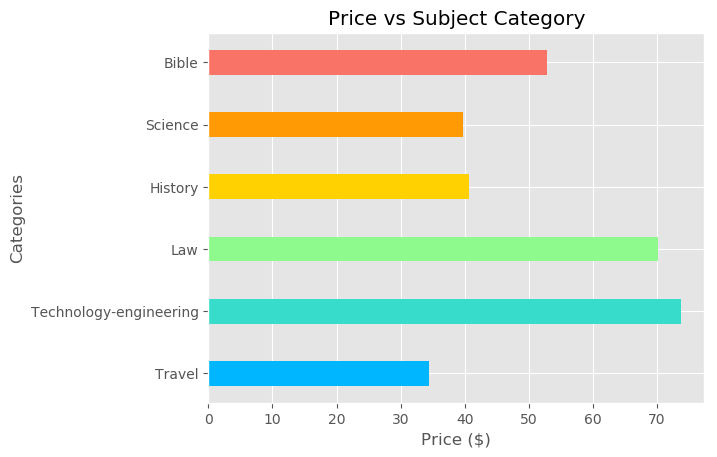

<Figure size 1600x1200 with 0 Axes>

In [7]:
catagories = ['Bible',
              'Science',
              'History',
              'Law',
              'Technology-engineering',
              'Travel'
              ]
catagories.reverse()
avaregePrice_category = []
colors = [[249/255, 116/255, 103/255 ],[255/255, 154/255, 5/255 ], 
           [255/255, 209/255, 0/255 ], [142/255, 250/255, 141/255 ],
          [56/255, 220/255, 202/255 ],[0/255, 183/255, 255/255 ]
           ]
colors.reverse()

for ii in catagories:
    avaregePrice_category.append(pn.loc[ pn.Category == ii].price.mean() )



width = 0.4                     # the width of the bars
ind = np.arange(len(catagories)) 
fig, ax = plt.subplots()
plt.figure(figsize=(16,12))


rects1 = ax.barh(ind,avaregePrice_category,width,
                color=colors)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Categories')
ax.set_title('Price vs Subject Category' )
##ax.set_xticks(ind)
ax.set_xlabel('Price ($)')
ax.set_yticks(ind)
ax.set_yticklabels(tuple(catagories))

#for ytick, color in zip(ax.get_yticklabels(), colors):
#    ytick.set_color(color)


plt.show()
 
plt.savefig('price_per_page.png')



/Users/Hike/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Hike/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Hike/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Hike/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set o

<Figure size 640x480 with 0 Axes>

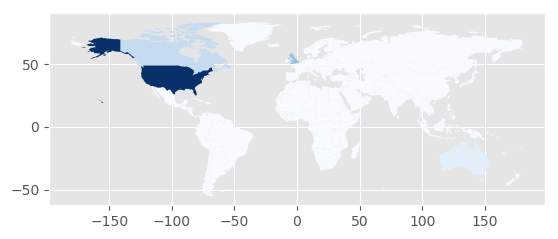

In [8]:
import geopandas as geopandas
from descartes import PolygonPatch

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

wrld = []
for _ in range(len(world)):
    wrld.append(5)

world['Count'] = pd.Series(wrld)
world.index = np.arange(0,len(world))
for i in range(len(wrld)-1):
    if world['name'][i] == 'United States':
        world['Count'][i] = 25
    elif world['name'][i] == 'United Kingdom':
        world['Count'][i] = 13
    elif world['name'][i] == 'Australia':
        world['Count'][i] = 7
    elif world['name'][i] ==  'Canada':
        world['Count'][i] = 10
world.head()
world = world[(world.name!='Antarctica')]
world.plot(column='Count', cmap='Blues');
plt.show()
